In this notebook, I compare snotel data against UAVSAR snow depth values (extracted from QGS Map2). The snow depth tiff files are saved inside snow-analytics/lowman/MCS directory. 

In [42]:
#import packages
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#print working directory
print(os.getcwd())

/home/naheemadebisi/snow-analytics/lowman


In [58]:
#read the cvs file
snowtel_SD = pd.read_csv('637_25_WATERYEAR=2021.csv', skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)
snowtel_SD

,SNWD.I-1 (in)
Date,
2020-10-01,0.0
2020-10-02,0.0
2020-10-03,0.0
2020-10-04,0.0
2020-10-05,0.0
...,...
2021-09-27,0.0
2021-09-28,0.0
2021-09-29,0.0


In [59]:
#Stat of the the data
snowtel_SD.describe()


,SNWD.I-1 (in)
count,365.000000
mean,24.821918
std,29.592072
min,0.000000
25%,0.000000
50%,0.000000
75%,53.000000
max,92.000000


In [60]:
#Info about the data
snowtel_SD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2020-10-01 to 2021-09-30
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNWD.I-1 (in)   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [61]:
#Set to datetime format
snowtel_SD.index = pd.to_datetime(snowtel_SD.index)
snowtel_SD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-10-01 to 2021-09-30
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNWD.I-1 (in)   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [62]:
#change the unit of the SD values to centimeter
snowtel_SD['SD (cm)'] = snowtel_SD['SNWD.I-1 (in) '] * 2.54
snowtel_SD

,SNWD.I-1 (in),SD (cm)
Date,,
2020-10-01,0.0,0.0
2020-10-02,0.0,0.0
2020-10-03,0.0,0.0
2020-10-04,0.0,0.0
2020-10-05,0.0,0.0
...,...,...
2021-09-27,0.0,0.0
2021-09-28,0.0,0.0
2021-09-29,0.0,0.0


In [63]:
snowtel_SD = snowtel_SD.loc['2021-01-01':'2021-04-30']

In [64]:
snowtel_SD

,SNWD.I-1 (in),SD (cm)
Date,,
2021-01-01,46.0,116.84
2021-01-02,44.0,111.76
2021-01-03,45.0,114.30
2021-01-04,54.0,137.16
2021-01-05,58.0,147.32
...,...,...
2021-04-26,31.0,78.74
2021-04-27,30.0,76.20
2021-04-28,29.0,73.66


In [65]:
#create a column of difference between current and previous snow depth
snowtel_SD['diff_SWE'] = snowtel_SD['SD (cm)'].diff()
snowtel_SD

/tmp/ipykernel_207416/2788045148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowtel_SD['diff_SWE'] = snowtel_SD['SD (cm)'].diff()


,SNWD.I-1 (in),SD (cm),diff_SWE
Date,,,
2021-01-01,46.0,116.84,NaN
2021-01-02,44.0,111.76,-5.08
2021-01-03,45.0,114.30,2.54
2021-01-04,54.0,137.16,22.86
2021-01-05,58.0,147.32,10.16
...,...,...,...
2021-04-26,31.0,78.74,7.62
2021-04-27,30.0,76.20,-2.54
2021-04-28,29.0,73.66,-2.54


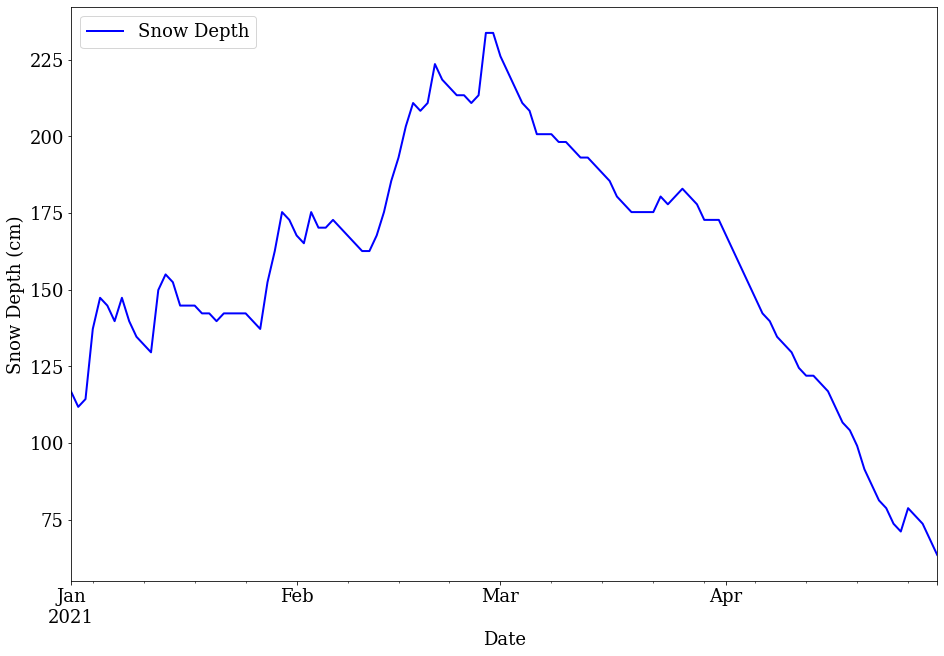

In [66]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

snowtel_SD.plot(ax=ax, y='SD (cm)', color='blue', linewidth=2, label='Snow Depth')

ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('Monthly_Mean_SWE.jpeg', dpi=500)

In [67]:
#The interferogram starts at 01-15-2021; let's take the snotel depth at the date as the base value
snotel_base = snowtel_SD.loc['2021-01-15']
snotel_base

SNWD.I-1 (in)      60.00
SD (cm)           152.40
diff_SWE           -2.54
Name: 2021-01-15 00:00:00, dtype: float64

In [70]:
#Create a dataframe of start and end dates for each interferograms

int_dates = [[1, '01-01-2021', '01-15-2021', 152.04],
            [2, '01-15-2021', '01-20-2021', -20.82343], 
            [3, '01-20-2021', '01-27-2021', -30.762129], 
            # [4, '01-27-2021', '02-03-2021', 3,46591],  
            [4, '02-03-2021', '02-10-2021', 0.270731], 
            [5, '03-03-2021', '03-10-2021', -9.52903],
            [6, '03-10-2021', '03-16-2021', 9.208427], 
            [7, '03-16-2021', '03-22-2021', 6.311231]]

uavsar_SD_df = pd.DataFrame(int_dates, columns= ['inteferograms', 'start_date', 'end_date', 'SnowDepth']).set_index('end_date')

uavsar_SD_df

,inteferograms,start_date,SnowDepth
end_date,,,
01-15-2021,1,01-01-2021,152.040000
01-20-2021,2,01-15-2021,-20.823430
01-27-2021,3,01-20-2021,-30.762129
02-10-2021,4,02-03-2021,0.270731
03-10-2021,5,03-03-2021,-9.529030
03-16-2021,6,03-10-2021,9.208427
03-22-2021,7,03-16-2021,6.311231


In [71]:
#set the index to datetime format
uavsar_SD_df.index = pd.to_datetime(uavsar_SD_df.index)

#Create a cumulative sum of the snow depth
uavsar_SD_df['cum_SD'] = uavsar_SD_df['SnowDepth'].cumsum()
uavsar_SD_df

,inteferograms,start_date,SnowDepth,cum_SD
end_date,,,,
2021-01-15,1,01-01-2021,152.040000,152.040000
2021-01-20,2,01-15-2021,-20.823430,131.216570
2021-01-27,3,01-20-2021,-30.762129,100.454441
2021-02-10,4,02-03-2021,0.270731,100.725172
2021-03-10,5,03-03-2021,-9.529030,91.196142
2021-03-16,6,03-10-2021,9.208427,100.404569
2021-03-22,7,03-16-2021,6.311231,106.715800


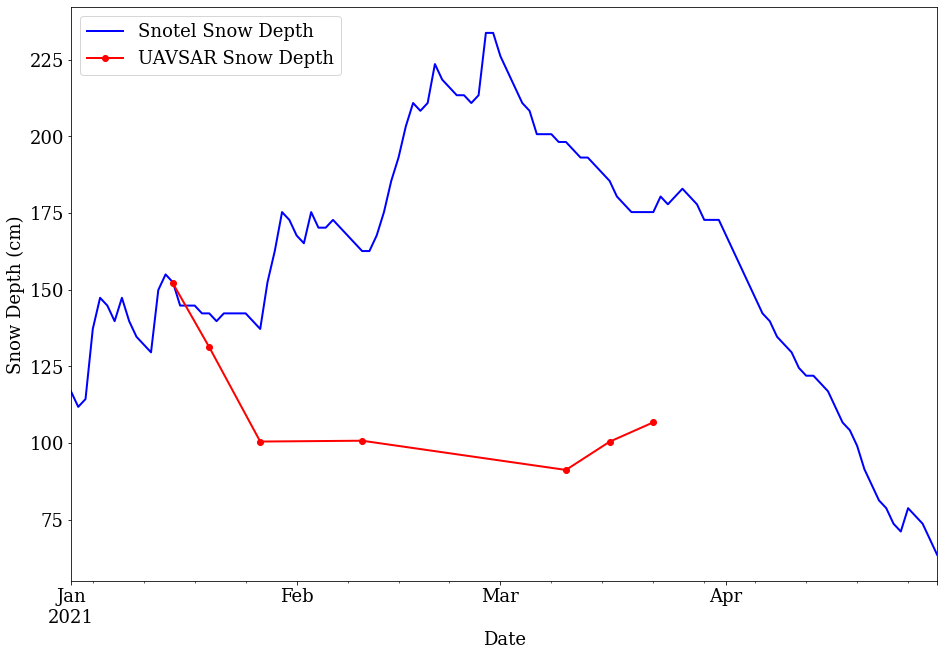

In [73]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snowtel_SD.plot(ax=ax, y='SD (cm)', color='blue', linewidth=2, label='Snotel Snow Depth')
uavsar_SD_df['cum_SD'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')

ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('Monthly_Mean_SWE.jpeg', dpi=500)